<center>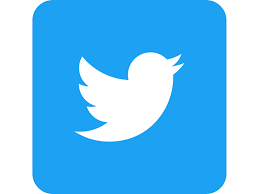</center>

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQMFvoMHABccfNgE2-0IQzuVhYci05TloJU4w&usqp=CAU"></center>

I was curious about the amount of signal meta features would have in classifying tweets are real or fake.
The following features were extracted
* Number_of_words	
* Number_of_Sentences	
* Number_of_Unique_Words	
* Number_of_Stop_Words	
* Number_of_Hashtage	
* Number_of_Mentions	
* Average_Word_Length

I ran a logistic regression model (for simplicity) to understand the affect of meta features
For someone who wants to starts with a baseline model and does not want to deal with unstructured data, I believe this a fun way to start.
*Results at the bottom*

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Author - Mihir Ahuja

Data Citations - https://www.kaggle.com/c/nlp-getting-started/overview

Note - *Using only Meta Features can we classify tweets as Fake or Real?*

In [ ]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import collections
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

nltk.download('punkt')

In [ ]:
train = pd.read_csv('/kaggle/input/training-meta-info-nlp-tweets/train_v3.csv')
test = pd.read_csv('/kaggle/input/tweetstest-v3/test_v3.csv')
train['text'] = train['text'].astype(str)
test['text'] = test['text'].astype(str)

In [ ]:
train

The idea is to only use meta features like Word count, sentence count, hashtags, etc and understand the signal that can be extracted purely from meta features

In [ ]:
feature_cols = ['Number_of_words',	'Number_of_Sentences',	'Number_of_Unique_Words',	'Number_of_Stop_Words',	'Number_of_Hashtage',	'Number_of_Mentions',	'Average_Word_Length']

In [ ]:
X = train[feature_cols] # Features
y = train.target

In [ ]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Using Threshold of 0.3

In [ ]:
def threshold_prob(predictions,threshold):
  arr = []
  for p in predictions:
    if p>threshold:
      arr.append(1)
    else:
      arr.append(0)
  return arr


predicted_class = threshold_prob(logreg.predict_proba(X_test)[::,1],0.3)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted_class)
cnf_matrix


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

As expected the model did not provide exceptional results.
With recall lower than 0.5
To understand the degree of impact of each meta features we can look at p-values of coefficients

* Accuracy: 0.6561679790026247
* Precision: 0.6023166023166023
* Recall: 0.49523809523809526